In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [17]:
df.drop(columns=['month'],inplace=True)

In [21]:
# The error occurs because there is no column named 'Unnamed' in the DataFrame.
# When reading a CSV with pandas, if the CSV has an unnamed index column, pandas will name it 'Unnamed: 0'.
# Let's check the columns and drop 'Unnamed: 0' if it exists.

if 'Unnamed: 0' in df.columns:
    df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [24]:
df.shape

(24, 4)

In [46]:
x=df[['unemployment_rate']]
y=df[['interest_rate']]

In [47]:
print(x)

    unemployment_rate
0                 5.3
1                 5.3
2                 5.3
3                 5.3
4                 5.4
5                 5.6
6                 5.5
7                 5.5
8                 5.5
9                 5.6
10                5.7
11                5.9
12                6.0
13                5.9
14                5.8
15                6.1
16                6.2
17                6.1
18                6.1
19                6.1
20                5.9
21                6.2
22                6.2
23                6.1


In [58]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.32,random_state=42)

In [29]:
import seaborn as sns

<Axes: ylabel='unemployment_rate'>

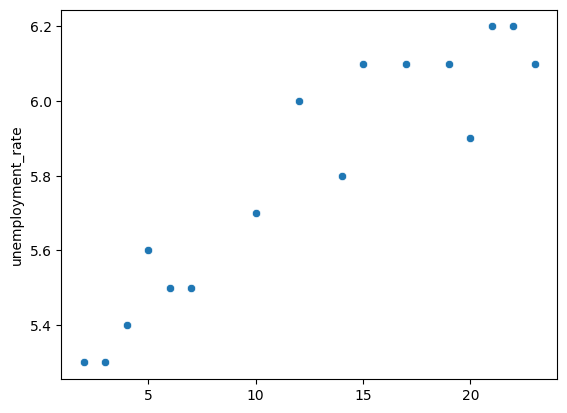

In [34]:
sns.scatterplot(X_train)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

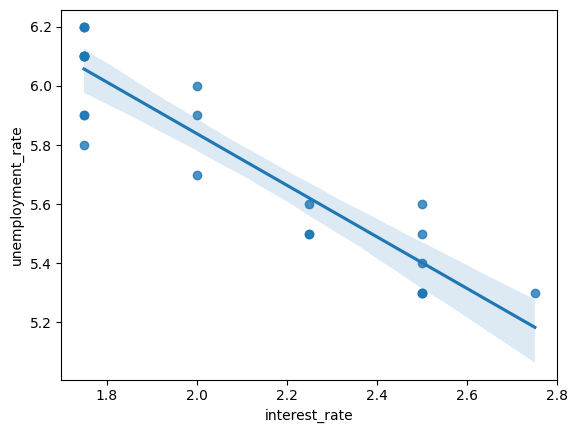

In [59]:
sns.regplot(y='unemployment_rate', x='interest_rate', data=df)

In [41]:
from sklearn.preprocessing import StandardScaler


In [42]:
scaler=StandardScaler()

In [48]:
# # Ensure X_train and x_test are 2D arrays before scaling
# import numpy as np

# X_train_2d = np.array(X_train).reshape(-1, 1)
# x_test_2d = np.array(x_test).reshape(-1, 1)

X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

In [45]:
print(X_train)

[[ 1.25707872]
 [-0.62853936]
 [-1.5713484 ]
 [ 0.62853936]
 [ 0.94280904]
 [-1.5713484 ]
 [-1.25707872]
 [ 1.25707872]
 [ 0.94280904]
 [ 0.31426968]
 [ 0.94280904]
 [-0.94280904]
 [-0.31426968]
 [ 0.        ]
 [ 0.94280904]
 [-0.94280904]]


In [50]:
regression=LinearRegression()

In [60]:
regression.fit(X_train,y_train)

LinearRegression()

In [61]:
from sklearn.model_selection import cross_val_score
val_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [62]:
val_score

array([-0.02452443, -0.01111829, -0.03464982])

In [63]:
np.mean(val_score)

np.float64(-0.023430848097156464)

In [68]:
x_pred=regression.predict(x_test)

In [69]:
print(x_pred)

[[2.33391204]
 [1.66415895]
 [2.52527006]
 [1.75983796]
 [1.95119599]
 [2.23823302]
 [1.95119599]
 [2.52527006]]


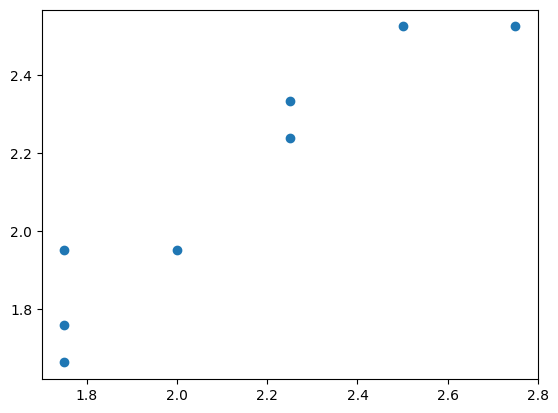

In [70]:
#Assumptions
plt.scatter(y_test,x_pred)

In [71]:
residuals=y_test-x_pred

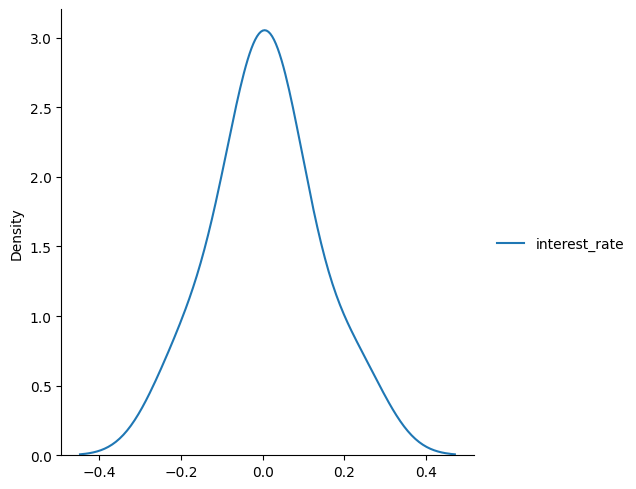

In [73]:
sns.displot(residuals,kind="kde")

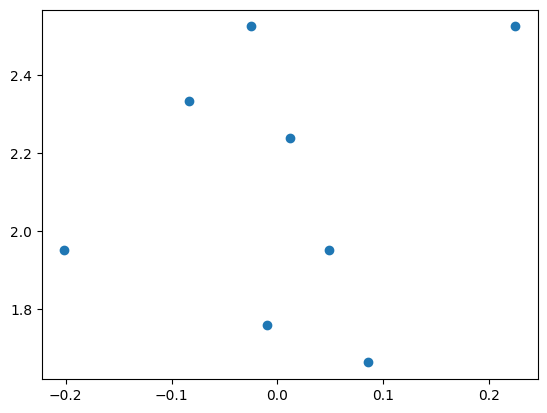

In [74]:
plt.scatter(residuals,x_pred)

In [76]:
regression.coef_

array([[-0.95679012]])

In [77]:
regression.intercept_

array([7.59625772])

In [78]:
import statsmodels.api as sm

In [80]:
ols_data=sm.OLS(X_train,y_train).fit()

In [81]:
print(ols_data)

In [83]:
res=(ols_data.predict(x_test))
print(res)

8     15.058311
16    16.974823
0     14.510736
18    16.701035
11    16.153460
9     15.332098
13    16.153460
1     14.510736
dtype: float64
